<a href="https://colab.research.google.com/github/logicappsource/angular-recipe/blob/master/Multi_Label_Text_Classifciation_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi Label Classification 

In [20]:
import pandas as pd 
import numpy as np
import re
import nltk
import json
import requests
import csv

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from wordcloud import WordCloud

# saving model using pickle 
nltk.download('stopwords')
nltk.download('word_tokenize')
nltk.download('SnowballStemmer')
nltk.download('punkt')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading word_tokenize: Package 'word_tokenize' not
[nltk_data]     found in index
[nltk_data] Error loading SnowballStemmer: Package 'SnowballStemmer'
[nltk_data]     not found in index
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, hamming_loss, f1_score


# Preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams['figure.dpi'] = 100


In [22]:
# Testing on multiple dataset - Multiple Tags - History of dataset to increase accuracy
#df = pd.read_csv('http://www.blog.pinploy.com/wp-content/uploads/2020/10/HH-Test-data4-10k.csv') #3 
#df = pd.read_csv('http://www.blog.pinploy.com/wp-content/uploads/2020/10/HH-tasks-testdata-4-final10k-.csv')

# Dataset = 1
#df = pd.read_csv('http://www.blog.pinploy.com/wp-content/uploads/2020/09/HHDataSet2.csv') 

# Dataset = 2 
#df = pd.read_csv('http://www.blog.pinploy.com/wp-content/uploads/2020/09/HH-Test-data3.csv') 

# Data set = 3 
#df = pd.read_csv('http://www.blog.pinploy.com/wp-content/uploads/2020/10/HH-task-3re-noduplicates.csv')

# iterations; Data set = version 4.0
#df = pd.read_csv('http://www.blog.pinploy.com/wp-content/uploads/2021/01/6-iterations-dataset-4.0.csv')

# v5 iteration 
#df = pd.read_csv('http://www.blog.pinploy.com/wp-content/uploads/2021/01/HHtaskv-5.csv')

# v6 iteration 
df = pd.read_csv('http://www.blog.pinploy.com/wp-content/uploads/2021/04/Machine-Learning-Bob-Consolidation-april2.csv')

# Testing on real data set for accuracy 
df_real_data = pd.read_csv('http://www.blog.pinploy.com/wp-content/uploads/2020/10/HH-real-data.csv', dtype='str')

In [23]:
df.head()

,Tag,Title,Description
0,"[flyttehjælp, handyman]",Køre affald væk,En Palle på ca 240 cm og lidt andet pap mv
1,[rengøring],Poleringsprojekt af messing møbel,Jeg søger hjælp til polering af ældre messing ...
2,[havearbejde],Tilbyder alt arbejde indenfor havearbejde.,Tilbyder alt arbejde indenfor havearbejde. Kon...
3,[havearbejde],Tilbyder alt arbejde indenfor havearbejde.,Tilbyder alt arbejde indenfor havearbejde. Kon...
4,"[møbelsamling, handyman, reparation-af-senge]",reparation af solseng,"Vi har en kunde i vores webshop, som har modta..."


In [24]:
#type(df['Tags'].iloc[0]) # Display type is str || num
import ast  # evaluation literal
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git
!pip install lemmy

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-_tl2_4ph
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-_tl2_4ph
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-cp37-none-any.whl size=11743 sha256=0b72c3db43598428e63171600176fbb8dc5a1da517bed0ff12acd64d836803ee
  Stored in directory: /tmp/pip-ephem-wheel-cache-j541cpao/wheels/a8/18/22/90afa4bd43247fb9a75b710a4a3fcd94966c022ce9e3c7d0a6
Successfully built preprocess-kgptalkie


Number of Total unique Tags in Dataset are: 1901
Some of the 10 Tags:  ['#ref!', '&', '(', '(el', '(front', '(ilva)]', '(lamelgardin)', '(og', '(stammekrone)]', '(til']
[rengøring]                                       754
[murer]                                           402
[maler]                                           377
[børnepasning]                                    288
[handyman]                                        223
                                                 ... 
[tømrer-&-snedker, hylder, køkkeninstallation]      1
[murer, Tømrer-&-Snedker, Handyman]                 1
[Samling af kommode]                                1
[Lægning af herregårdssten]                         1
[Altmuligmand søges]                                1
Name: Tag, Length: 3193, dtype: int64


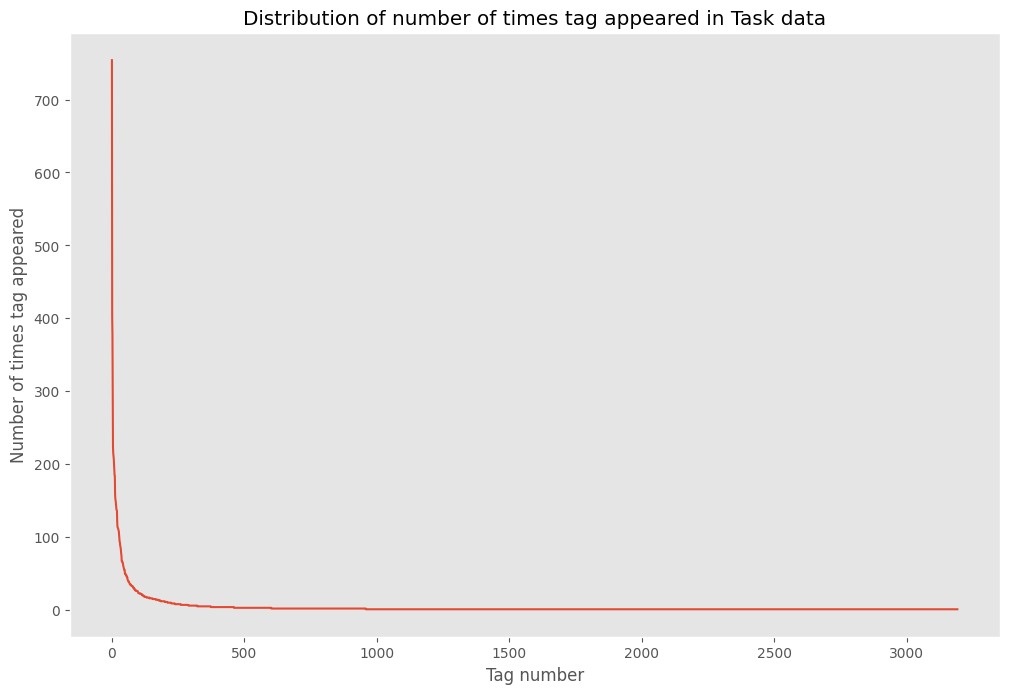

In [25]:
# Eexploratary Data Analysis  | of Target Variable of unique Tags
vector = CountVectorizer(tokenizer=lambda x:x.split())
tag_dtm = vector.fit_transform(df["Tag"].values.astype('U'))
print("Number of Total unique Tags in Dataset are:", tag_dtm.shape[1])

# Get x tags
tag = vector.get_feature_names()
print("Some of the 10 Tags: ", tag[:10])

# Number of times tag appeared 
freqs = tag_dtm.sum(axis=0).A1
result = dict(zip(tag, freqs))

print(df["Tag"].value_counts())
tag_df_sorted = df["Tag"].value_counts()

#tag_df_sorted = sort_values(['count'], ascending=False) 
#tag_df_sorted = tag.sort_values(['Count'], ascending=False)

tag_counts = tag_df_sorted.values

plt.plot(tag_counts)
plt.title("Distribution of number of times tag appeared in Task data")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()


## Detailed Tag Trend

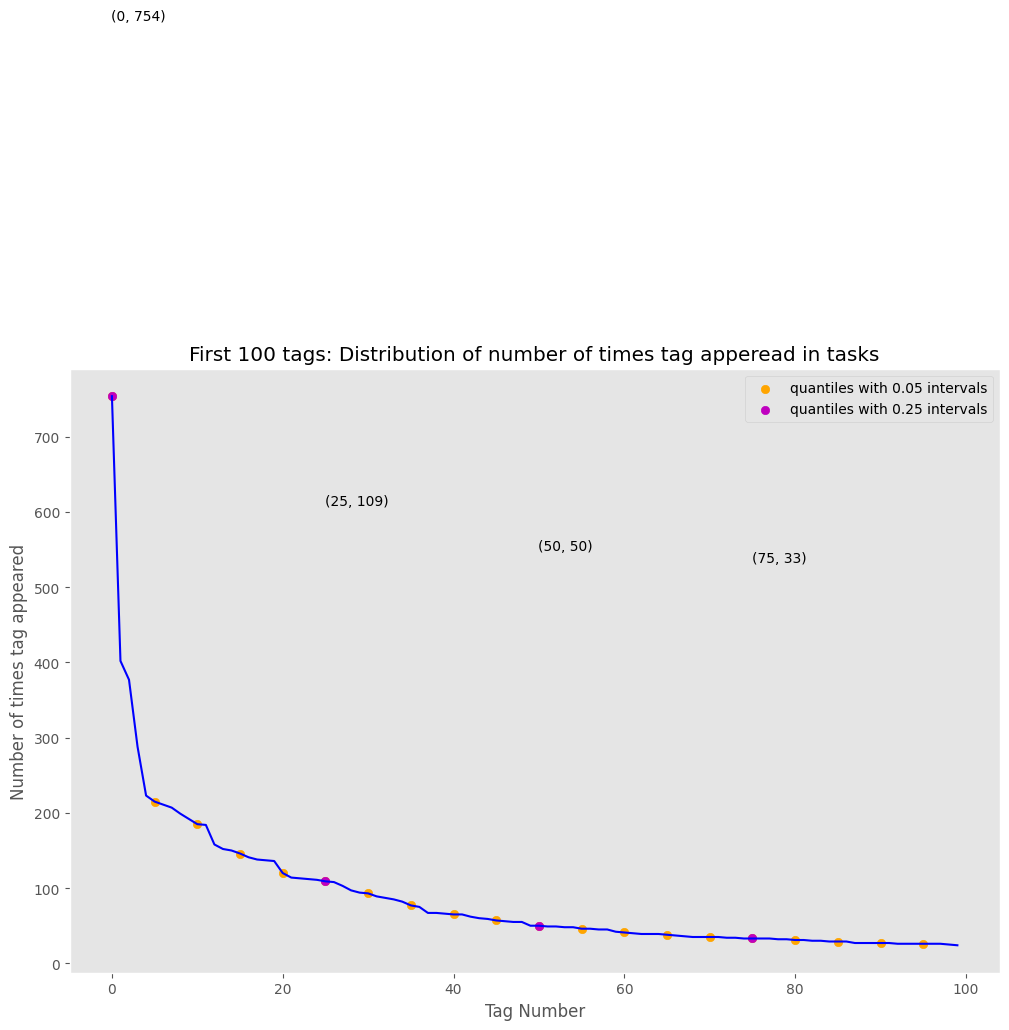

20 [754 215 185 146 120 109  93  77  65  57  50  46  41  38  35  33  31  29
  27  26]


In [26]:
plt.plot(tag_counts[0:100], c='b')
plt.scatter(x=list(range(0,100,5)), y=tag_counts[0:100:5], c='orange', label='quantiles with 0.05 intervals')
# Quantiles with 0.25 difference 
plt.scatter(x=list(range(0, 100, 25)), y=tag_counts[0:100:25], c='m', label='quantiles with 0.25 intervals')

for x,y in zip(list(range(0,100,25)), tag_counts[0:100:25]):
  plt.annotate(s="({}, {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500))

plt.title('First 100 tags: Distribution of number of times tag apperead in tasks')
plt.grid()
plt.xlabel('Tag Number')
plt.ylabel('Number of times tag appeared')
plt.legend()
plt.show()
print(len(tag_counts[0:100:5]), tag_counts[0:100:5])



## Word Cloud Visualization of Tags 

In [31]:
# Remove duplicates
#tags_map_wordcloud = df["Tag"].drop_duplicates(keep=False, inplace=True) #["Tag"]
#print(tags_map_wordcloud)

#word_cloud_words_from_text = " ".join(word for word in df["Tag"])
#word_cloud_stop_words = set(stop_words)
#Initializing WordCloud using frequencies of tags.
#wordcloud = WordCloud(    stopwords=word_cloud_stop_words,
                          #background_color='black',
                          #width=1200,
                          #height=600,
                  #  ).generate(word_cloud_words_from_text)

#fig = plt.figure(figsize=(30,20))
#plt.imshow(wordcloud)
#plt.axis('off')
#plt.tight_layout(pad=0)
#fig.savefig("tag.png")
#plt.show()


## Tags per Task - Analysis

In [32]:
df["tag_count"] = df["Tag"].apply(lambda x:len(x.split()))
print()
sns.countplot(x=df["tag_count"], data=df)

AttributeError: ignored

In [ ]:
# Text Preprocessing - Removing stop words
stop_words = set(stopwords.words('danish'))
stemmer = SnowballStemmer("danish")
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

import lemmy

# Create an instance of the standalone lemmatizer.
lemmatizer = lemmy.load("da")

# Merging data column into one column text 
text_list = []

for index, row in df.iterrows():
  title, description, tags = row['Title'], row['Description'], row['Tag']
  text = str(title) + " " + str(description)
  text = re.sub(r'[^A-Za-z]+]', ' ', text)
  words = word_tokenize(str(text.lower()))
  tags = tags.lower()

  # replace REPLACE_BY_SPACE_RE symbols by space in text
  text = re.sub(REPLACE_BY_SPACE_RE," ",text,)

  # delete symbols which are in BAD_SYMBOLS_RE from text
  text = re.sub(BAD_SYMBOLS_RE,"",text)
  text = re.sub(r'\s+'," ",text)

  text = ' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j) !=1 or j=='c'))

  # lemmetization 
  # text = ' '.join(str(lemmatizer.lemmatize("", j)) for j in words if j not in stop_words and (len(j) !=1 or j=='c'))

  text_list.append(text)
  
# Data frame Text (Title, Description) => Merged  
df['Text'] = text_list

## iterate over each word - replace with lemmtization - GET THIS TO WORK
#df['Text'] = map(lambda x: str.replace(x,lemmatizer.lemmatize("", w)), text_list)

#### FOR REAL DATA TESTING ####
text_list_real_data = []

for index,row in df_real_data.iterrows():
  title, description = row['Titel'], row['Description']
  text = str(title) + " " + str(description)
  text = re.sub(r'[^A-Za-z]+]', ' ', text)
  words = word_tokenize(str(text.lower()))
  text = ' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j) !=1 or j=='c'))
  text_list_real_data.append(text)

# Test data 100 set 
df_real_data['Text'] = text_list_real_data 

# Improved preprocessing 
import preprocess_kgptalkie as kgp
df_real_data['text'] = df_real_data['Text']

df_real_data = kgp.get_basic_features(df_real_data)
df_real_data.head()

In [ ]:
# Frequency 
#freqs = kgp.get_word_freqs(df_real_data, 'Description')
#top40 = freqs[100:140]
#plt.bar(top40.index, top40.values)
#plt.xticks(rotation=90)
#plt.show()

In [ ]:
# Character Counts 
#sns.distplot(df_real_data['char_counts'])

### Most & Least Common Words 

In [ ]:
# Top 20 most common words 
print(df_real_data)
freqs = kgp.get_word_freqs(df_real_data, 'Description')
top10 = freqs[1:20]
plt.bar(top10.index, top10.values)
plt.xticks(rotation=60)
#plt.show()

In [ ]:
# Least 20 common words 
least20 = freqs[-30:]
bigram = kgp.get_ngram(df_real_data, 'Description', ngram_range=2)
bigram[-30:]


wordcloud_least_freq = WordCloud(stopwords=stop_words ,width=800, height=400).generate(str(least20))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud_least_freq, interpolation="bilinear")
plt.axis('off')
plt.title('Top 20 Least Common Words', fontsize=30)
plt.tight_layout(pad=0)
#plt.show()

## Extra data cleaning - Part v2.0


In [ ]:
# remove - URLS, Emails, Htmltags, special chars, duplicated chars, 
def get_clean(x):
  x = str(x).lower().replace('\\',' ').replace('_',' ').replace('.',' ')
  x = kgp.cont_exp(x)
  x = kgp.remove_emails(x)
  x = kgp.remove_urls(x)
  x = kgp.remove_html_tags(x)
  x = kgp.remove_rt(x)
  x = kgp.remove_accented_chars(x)
  x = kgp.remove_special_chars(x)
  x = kgp.remove_dups_char(x)
  return x

### MODIFY DESRCRIPTION to TEXT 
#df_real_data['Text'] = df_real_data['Text'].apply(lambda x: get_clean(x)) ### MODIFY DESRCRIPTION to TEXT 
#df['Text'] = df['Text'].apply(lambda x: get_clean(x)) ### MODIFY DESRCRIPTION to TEXT 
#modify to Text ? - title + desc is merged 
#df_real_data['Description'] = df_real_data['Description'].apply(lambda x: get_clean(x)) 

df_real_data.head()['Description']
#df_real_data.head()['Titel']


## Word Cloud visualization

In [ ]:
word_cloud_words_from_text = " ".join(word for word in df_real_data['text'])
word_cloud_stop_words = set(stop_words)
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    stopwords=word_cloud_stop_words,
                          background_color='black',
                          width=1200,
                          height=600,
                    ).generate(word_cloud_words_from_text)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()


In [ ]:
#df['Tags'] = df['Tags'].apply(lambda x: ast.literal_eval(x)) # modify str literal to list data 
df.head()
## testing on real data
df_real_data.head()

# Convert tags into onehot encoding 

In [ ]:
y = df['Tag']
type(df['Tag'].iloc[0] )
y



In [ ]:
multilabel = MultiLabelBinarizer()

#df['Tag'] = df['Tag'].dropna()
#print(df['Tag'].dtypes)
#arr = multilabel.fit_transform(df.loc[mask, 'Tag'].dropna()) #.str.strip('[]').str.split(',')
#new_df = (pd.DataFrame(arr, index=df.index[mask], columns=multilabel.classes_).reindex(df.index, fill_value=0))

# implement library instead 
# Use Regular expression instead at some point 
df['Tag'] = df['Tag'].str.replace("[","")
df['Tag'] = df['Tag'].str.replace("]","")
df['Tag'] = df['Tag'].str.replace("'","")

df['Tag'] = df['Tag'].str.replace("/","")
df['Tag'] = df['Tag'].str.replace("&","")
df['Tag'] = df['Tag'].str.replace("%","")
df['Tag'] = df['Tag'].str.replace("-","")
df['Tag'] = df['Tag'].str.replace("\n","")


#df = df.applymap(lambda s: s.lower())
#y = multilabel.fit_transform(str(df['Tag']).str.split(', ')) 
y = multilabel.fit_transform(df['Tag'].str.split(', ')) 
y


# Test here for neural network 
#filter_length = 300
#num_classes = 120
#model = Sequential()
#model.add(Embedding(max_words, 20, input_length=maxlen))
#model.add(Dropout(0.1))
#model.add(Conv1D(filter_length, 3, padding='valid', activation='relu', strides=1))
#model.add(GlobalMaxPool1D())
#model.add(Dense(num_classes))
#model.add(Activation('sigmoid'))

#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['categorical_accuracy'])
#model.summary()
#callbacks = [
#             ReduceROnPlateau(),
#             EarlyStopping(patience=4),
#             ModelCheckpoint(filepath='model-conv1d.h5', save_best_only=True) 
#]

#history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.1, callbacks=callbacks)

In [ ]:
multilabel.classes_ # Classes 

In [ ]:
#pd.DataFrame(y, columns=multilabel.classes_)

In [ ]:
# Term Freq * inverse docoument frequency 
tfidf = TfidfVectorizer(analyzer='word', strip_accents='unicode', max_features=11500, ngram_range=(1,2), max_df=0.9, min_df=10) # stop_words  stop_words='danish'  , ngram=1,3 stop_words=stop_words,
#tfidf = TfidfVectorizer(strip_accents='unicode', analyzer='word',max_features=11500, ngram_range=(1,2), norm='l2', max_df=0.6, min_df=2) 
X = tfidf.fit_transform(df['Text']) # convert Text 

In [ ]:
X

In [ ]:
#tfidf.vocabulary_
# words of selection tokenizer vocabulary  -- Limited to max_features
#tfidf.stop_words_

In [ ]:
X.shape, y.shape # Rows && Features   y=column => top tags 

# Train Test & Split 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 0) # X = feature , y = target  #  stratify = y - min. 2 class for 1 label - Stratify

# Build Model

In [ ]:
sgd = SGDClassifier()
lr = LogisticRegression(solver='saga', max_iter=2000)# solver='lbfgs' # small dataset = liblinear  ||  sag && saga good fit for larger dataset  => Optimization problem 
svc = LinearSVC(C=1.2, class_weight='balanced') #class_weight='balanced'  1.6 for SVC regular

In [ ]:
def j_score(y_true, y_pred):
  jaccard = np.minimum(y_true, y_pred).sum(axis = 1) / np.maximum(y_true, y_pred).sum(axis = 1)
  return jaccard.mean() * 100

def hamming_score(y_true, y_pred, normalize=True, sample_weigth=None):
  acc_list = []
  for i in range(y_true.shape[0]):
    set_true = set(np.where(y_true[i])[0])
    set_pred = set(np.where(y_pred[i])[0])
    tmp_a = None
    if len(set_true) == 0 and len(set_pred) == 0:
      tmp_a = 1 
    else:
      tmp_a = len(set_true.intersection(set_pred))/\
              float( len(set_true.union(set_pred)) )
    acc_list.append(tmp_a)
  return np.mean(acc_list)


def print_score(y_pred, clf): 
  print('----------------------------------------------------')
  print("Clf: ", clf.__class__.__name__)
  print('----------------------------------------------------')
  print('Jaccard score: {}'.format(j_score(y_test, y_pred)))
  print('----------------------------------------------------')
  print('Hamming Score: {0}'.format(hamming_score(y_test, y_pred))) 
  print('----------------------------------------------------')
  print('Accuracy of classifier: {0}'.format(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)))
  print('----------------------------------------------------')
  print('Hamming loss: {0}'.format(hamming_loss(y_test, y_pred)))
  print('----------------------------------------------------') 
  print('F-1 Score Meassure: {0}'.format(f1_score(y_test, y_pred, average='micro', labels=None, sample_weight=None, zero_division='warn')))




## Iteration

In [ ]:
# Multi label classification performance metrics 

for classifier in [sgd, lr, svc]: # Train model
  clf = OneVsRestClassifier(classifier) # Link for estimator  -> binary relevance
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print_score(y_pred, classifier)
  print('Classification Report ')
  print(classification_report(y_test, y_pred))


for classifier2 in [LinearSVC(C=2.2, penalty='l2', dual=False, loss='squared_hinge')]: # try penality l1  #1.9 C
  clf = OneVsRestClassifier(classifier2)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print('---------- Classifier Liner SVC 2  ------------')
  print_score(y_pred, classifier2)
  print('Classification Report ')
  print(classification_report(y_test, y_pred))


## Model Test with Real Data 

In [ ]:
# Dummy tasks from DB 
#x = ['jeg skal have flyttet hjælp til mine møbler til en anden addresse, jeg har ikke nogle bil og de kan være tunge. Du skal selv bære alting ned fra 5 sal. Har 10 flyttekasser med blandet ting. Du kan nok godt køre det i to læs'] 
#all_task_raw = []


# Transform to correct data type 
#for taskData in df_real_data['Text']:
#  all_task_raw.append([taskData])

# Predcit Tag for Task => Store into csv file 
#with open('TaskTagData.csv', mode='w', newline='') as f:
 # for prediction in all_task_raw:
 #   xT = tfidf.transform(prediction)
 #   y_pred = clf.predict(xT)
 #   predicted_tag = multilabel.inverse_transform(clf.predict(xT))
 #   print('Prediction Task Data',prediction ,predicted_tag)
    # Save data to txt
  #  csv_writer = csv.writer(f, delimiter=',', quotechar='"')
  #  csv_writer.writerow([prediction, predicted_tag])
